# Introduction

This is the final solution for the Regression Task. The full report, slides, and supporting materials—including proofs, notebooks, and predictions—can be found at: https://github.com/tanthinhdt/cbbl-2025.

In [1]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-1

In [2]:
import warnings


data_dir = "/kaggle/input/cbbl-recruitment-semester-2-regression"
random_state = 42
warnings.filterwarnings("ignore")

# Data Processing

In [3]:
import pandas as pd


train_df = pd.read_csv(f"{data_dir}/train.csv")
X_train = train_df.iloc[:, 1:-1]
y_train = train_df.iloc[:, -1]

print("Missing Values:")
print(train_df.isnull().sum())

train_df

Missing Values:
ID                             0
Material                       0
Type                           0
Shape                          0
Coat/Functional Group       1102
Synthesis_Method               0
Surface_Charge                 0
Cell_Type                      0
No_of_Cells (cells/well)       0
Human_Animal                   0
Cell_Source                    0
Cell_Tissue                    0
Cell_Morphology                0
Cell_Age                       0
Cell Line_Primary Cell         0
Time (hr)                      0
Concentration (ug/ml)          0
Test                           0
Test_Indicator                 0
Size                           0
Zeta                           0
Target                         0
dtype: int64


,ID,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,...,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta,Target
0,472,Pt,I,Sphere,PVP,Chemical Reduction,Negative,IMR90,5000.0,H,...,Fibroblast,Adult,L,24,25.0,CellTiterGlo,LuciferaseEnzyme,4.00,-8.00,98.293
1,232,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000.0,A,...,Fibroblast,Adult,L,24,50.0,MTT,TetrazoliumSalt,25.76,-46.80,90.476
2,2041,EudragitRL,O,Sphere,NaN,Emulsion-Solvent Evaporation,Positive,THP-1,5000.0,H,...,Monocyte,Adult,L,24,25.0,MTT,TetrazoliumSalt,142.00,56.00,123.470
3,437,Au,I,Sphere,Citrate,Chemical Reduction,Negative,Jurkat,500000.0,H,...,Lymphoblast,Adult,L,24,1.5,MTT,TetrazoliumSalt,7.00,-99.00,89.391
4,68,SLN,O,Sphere,NaN,Emulsion-Solvent Evaporation,Negative,A549,100000.0,H,...,Epithelial,Adult,L,24,3671.1,NRU,TetrazoliumSalt,98.40,-14.60,29.601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,611,Dendrimer,O,Sphere,C12,Commercial,Positive,hNPC,100000.0,H,...,Neuronal,Embryonic,P,72,1.0,MTT,TetrazoliumSalt,4.50,54.47,110.620
1771,479,ZnO,I,Sphere,NaN,Commercial,Positive,HCMEC,50000.0,H,...,Epithelial,Adult,P,12,0.1,MTT,TetrazoliumSalt,45.30,32.70,100.330
1772,732,C70,C,Sphere,NaN,Commercial,Negative,V79,10000.0,A,...,Fibroblast,Adult,L,24,5.0,MTT,TetrazoliumSalt,57.00,-35.00,92.898
1773,1184,Polystyrene,O,Sphere,COOH,Commercial,Negative,HeLa,5000.0,H,...,Epithelial,Adult,L,48,5.0,CCK-8,TetrazoliumSalt,50.00,-9.00,105.980


In [4]:
test_df = pd.read_csv(f"{data_dir}/test.csv")
X_test = test_df.iloc[:, 1:]

print("Missing Values:")
print(test_df.isnull().sum())

X_test

Missing Values:
ID                            0
Material                      0
Type                          0
Shape                         0
Coat/Functional Group       475
Synthesis_Method              0
Surface_Charge                0
Cell_Type                     0
No_of_Cells (cells/well)      0
Human_Animal                  0
Cell_Source                   0
Cell_Tissue                   0
Cell_Morphology               0
Cell_Age                      0
Cell Line_Primary Cell        0
Time (hr)                     0
Concentration (ug/ml)         0
Test                          0
Test_Indicator                0
Size                          0
Zeta                          0
dtype: int64


,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,Ag,I,Sphere,Citrate,Commercial,Negative,CCL-110,5000,H,Human,Skin,Fibroblast,Fetus,P,24,0.50,MTS,TetrazoliumSalt,39.94,-23.5
1,Chitosan,O,Irregular,NaN,Ionotropic Gelation Method,Positive,MBMC,10000,A,Mouse,BoneMarrow,Spindle,Adult,P,72,31.25,MTT,TetrazoliumSalt,475.20,71.3
2,NiO,I,Sphere,NaN,Commercial,Positive,HepG2,10000,H,Human,Liver,Epithelial,Adult,L,24,100.00,MTS,TetrazoliumSalt,21.60,25.3
3,TiO2,I,Sphere,NaN,Commercial,Negative,A549,30000,H,Human,Lung,Epithelial,Adult,L,48,10.00,MTT,TetrazoliumSalt,81.80,-8.6
4,Chitosan,O,Irregular,NaN,Ionotropic Gelation Method,Positive,MBMC,10000,A,Mouse,BoneMarrow,Spindle,Adult,P,24,1000.00,MTT,TetrazoliumSalt,384.60,62.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Au,I,Sphere,CYS,Chemical Reduction,Negative,L929,5000,A,Mouse,SubcutaneousConnectiveTissue,Fibroblast,Adult,L,24,5.00,MTT,TetrazoliumSalt,25.76,-46.8
758,MWCNT,C,Nanotube,NaN,Commercial,Neutral,HUVEC,40000,H,Human,Umbilical Vein,Endothelial,Embryonic,P,24,32.00,NRU,NeutralRed,17.60,0.9
759,PLGA,O,Sphere,Chitosan,Emulsion-Solvent Evaporation,Positive,Colo_205,10000,H,Human,Colon,Epithelial,Adult,L,24,1250.00,MTS,TetrazoliumSalt,204.00,10.0
760,C60,C,Sphere,Dextran,Commercial,Negative,C6,10000,A,Rat,Brain,Fibroblast,Adult,L,24,25.00,MTT,TetrazoliumSalt,30.00,-16.9


## Missing Values Handling

In [5]:
print("Number of NaN values in train set before:", X_train.isna().sum().sum())
print("Number of NaN values in test set before:", X_test.isna().sum().sum())

mode_value = X_train["Coat/Functional Group"].mode()[0]
X_train["Coat/Functional Group"].fillna(mode_value, inplace=True)
X_test["Coat/Functional Group"].fillna(mode_value, inplace=True)

print("Number of NaN values in train set after:", X_train.isna().sum().sum())
print("Number of NaN values in test set after:", X_test.isna().sum().sum())

Number of NaN values in train set before: 1102
Number of NaN values in test set before: 475
Number of NaN values in train set after: 0
Number of NaN values in test set after: 0


## Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
num_cols = X_train.select_dtypes(include=["int", "float"]).columns.tolist()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Feature Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder


cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
encoder = LabelEncoder()

for cols in cat_cols:
    X_train[cols] = encoder.fit_transform(X_train[cols])
    X_test[cols] = encoder.transform(X_test[cols])

X_train

,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Surface_Charge,Cell_Type,No_of_Cells (cells/well),Human_Animal,Cell_Source,Cell_Tissue,Cell_Morphology,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta
0,20,1,6,23,1,0,26,0.004004,1,2,15,2,0,0,0.234043,0.001784,3,4,0.003833,0.609756
1,2,1,6,4,1,0,31,0.004004,0,4,22,2,0,0,0.234043,0.003567,8,7,0.033098,0.452033
2,11,2,6,6,6,2,46,0.004004,1,2,2,7,0,0,0.234043,0.001784,8,7,0.189429,0.869919
3,2,1,6,6,1,0,28,0.499499,1,2,2,5,0,0,0.234043,0.000107,8,7,0.007868,0.239837
4,21,2,6,6,6,0,4,0.099099,1,2,15,1,0,0,0.234043,0.261937,9,7,0.130791,0.582927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,9,2,6,1,4,2,53,0.099099,1,2,4,10,1,1,0.744681,0.000071,8,7,0.004505,0.863699
1771,25,1,6,6,4,2,14,0.049049,1,2,12,1,0,1,0.106383,0.000007,8,7,0.059377,0.775203
1772,4,0,6,6,4,0,49,0.009009,0,1,15,2,0,0,0.234043,0.000357,8,7,0.075113,0.500000
1773,19,2,6,2,4,0,24,0.004004,1,2,6,1,0,0,0.489362,0.000357,1,7,0.065698,0.605691


## Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA


pca_cols = [
    "Surface_Charge",
    "Human_Animal",
    "Cell_Age",
]
n_components = len(pca_cols) - 1
pca = PCA(n_components=n_components, whiten=True)
new_col_names = [f"PCA_{i+1}" for i in range(n_components)]

X_train = pd.concat(
    [
        X_train.drop(columns=pca_cols),
        pd.DataFrame(pca.fit_transform(X_train[pca_cols]), columns=new_col_names)
    ],
    axis=1,
)

X_test = pd.concat(
    [
        X_test.drop(columns=pca_cols),
        pd.DataFrame(pca.transform(X_test[pca_cols]), columns=new_col_names)
    ],
    axis=1,
)

print("Feature sets after PCA:", (X_train.shape, X_test.shape))
print("Number of NaN values in train set:", X_train.isna().sum().sum())
print("Number of NaN values in test set:", X_test.isna().sum().sum())

X_train

Feature sets after PCA: ((1775, 19), (762, 19))
Number of NaN values in train set: 0
Number of NaN values in test set: 0


,Material,Type,Shape,Coat/Functional Group,Synthesis_Method,Cell_Type,No_of_Cells (cells/well),Cell_Source,Cell_Tissue,Cell_Morphology,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Test,Test_Indicator,Size,Zeta,PCA_1,PCA_2
0,20,1,6,23,1,26,0.004004,2,15,2,0,0.234043,0.001784,3,4,0.003833,0.609756,-0.529738,-0.630349
1,2,1,6,4,1,31,0.004004,4,22,2,0,0.234043,0.003567,8,7,0.033098,0.452033,-0.480622,0.302442
2,11,2,6,6,6,46,0.004004,2,2,7,0,0.234043,0.001784,8,7,0.189429,0.869919,1.920336,-0.609200
3,2,1,6,6,1,28,0.499499,2,2,5,0,0.234043,0.000107,8,7,0.007868,0.239837,-0.529738,-0.630349
4,21,2,6,6,6,4,0.099099,2,15,1,0,0.234043,0.261937,9,7,0.130791,0.582927,-0.529738,-0.630349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,9,2,6,1,4,53,0.099099,2,4,10,1,0.744681,0.000071,8,7,0.004505,0.863699,1.890263,1.345037
1771,25,1,6,6,4,14,0.049049,2,12,1,1,0.106383,0.000007,8,7,0.059377,0.775203,1.920336,-0.609200
1772,4,0,6,6,4,49,0.009009,1,15,2,0,0.234043,0.000357,8,7,0.075113,0.500000,-0.480622,0.302442
1773,19,2,6,2,4,24,0.004004,2,6,1,0,0.489362,0.000357,1,7,0.065698,0.605691,-0.529738,-0.630349


## Outliers Handling

Lower Bound: -18.190255269759987, Upper Bound: 170.80711648666136


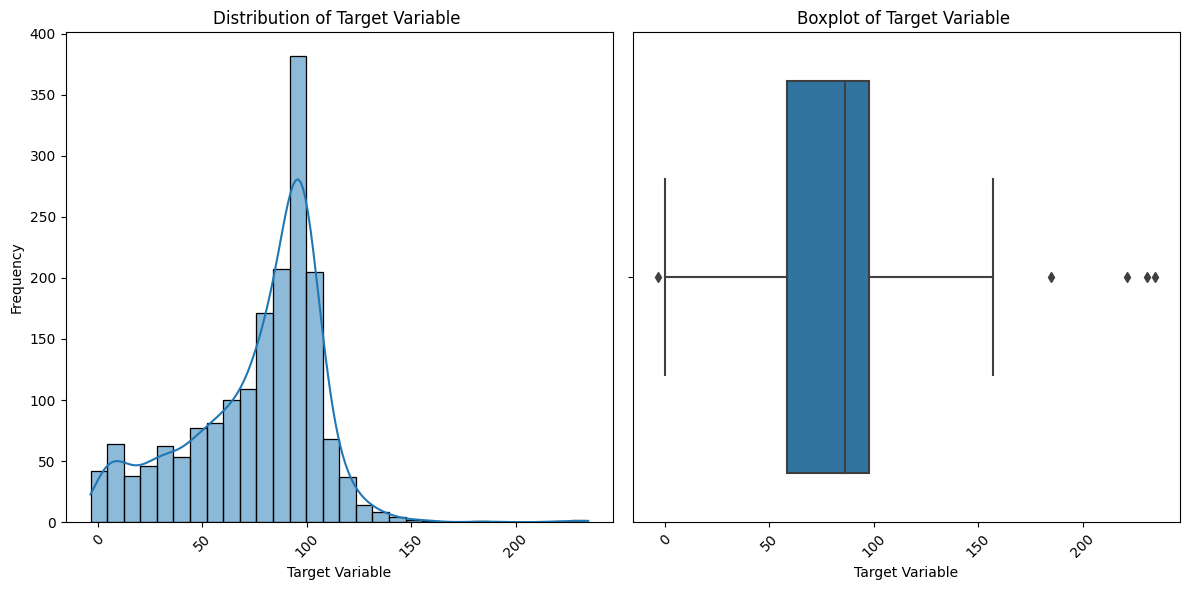

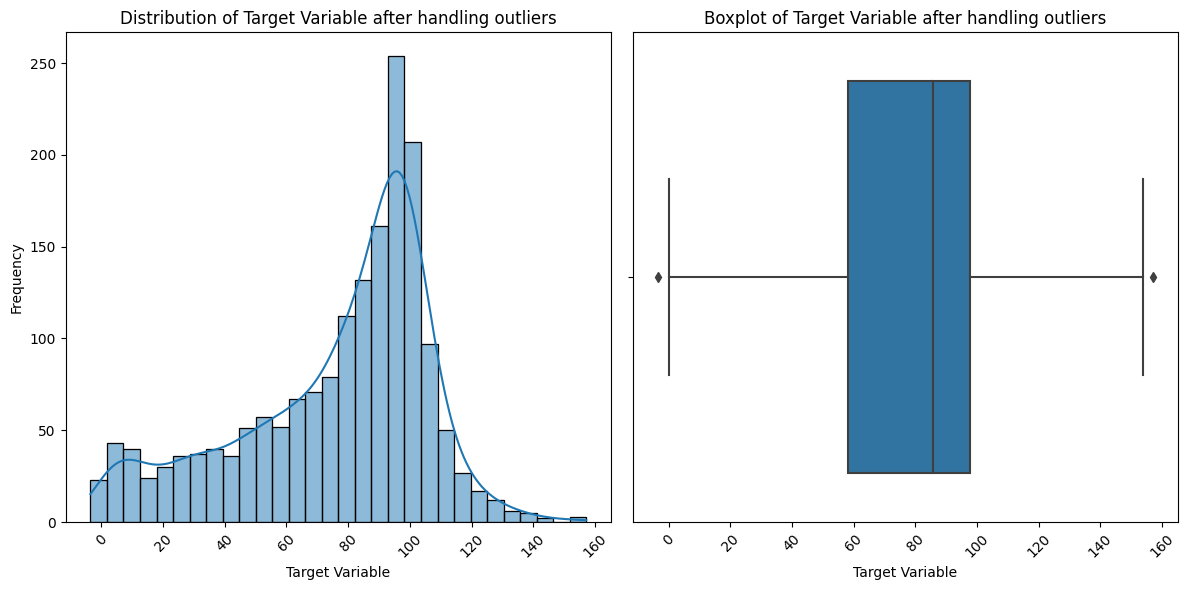

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_distribution(y, subfix) -> None:

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    sns.histplot(y, kde=True, bins=30)
    plt.title(f"Distribution of Target Variable {subfix}")
    plt.xlabel("Target Variable")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=y)
    plt.title(f"Boxplot of Target Variable {subfix}")
    plt.xlabel("Target Variable")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


mean = y_train.mean()
std = y_train.std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

plot_distribution(y_train, "")
mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train = X_train[mask]
y_train = y_train[mask]
plot_distribution(y_train, "after handling outliers")

# Model Training

In [10]:
from tabpfn import TabPFNRegressor


model = TabPFNRegressor(
    random_state=random_state,
    n_estimators=10,
    softmax_temperature=0.5,
    average_before_softmax=True,
)
model.fit(X_train, y_train)

tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

TabPFNRegressor(average_before_softmax=True, n_estimators=10, random_state=42,
                softmax_temperature=0.5)

# Inference

In [11]:
y_pred = model.predict(X_test)
submission = pd.DataFrame({"ID": test_df["ID"], "Target": y_pred})
submission.to_csv("submission.csv", index=False)
submission

,ID,Target
0,32,101.061172
1,376,102.689415
2,71,66.628304
3,2232,78.069260
4,2018,105.504440
...,...,...
757,2356,104.484192
758,64,94.120224
759,649,94.180527
760,1484,80.838547
